In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [2]:
LABELS = 10 # Number of different types of labels (1-10)
WIDTH = 28 # width / height of the image
CHANNELS = 1 # Number of colors in the image (greyscale)

VALID = 10000 # Validation data size

STEPS = 3500 #20000#   # Number of steps to run
BATCH = 100 # Stochastic Gradient Descent batch size
PATCH = 5 # Convolutional Kernel size
DEPTH = 8 #32 # Convolutional Kernel depth size == Number of Convolutional Kernels
HIDDEN = 100 #1024 # Number of hidden neurons in the fully connected layer

LR = 0.001 # Learning rate

In [3]:
data = pd.read_csv('data/train.csv') # Read csv file in pandas dataframe
labels = np.array(data.pop('label')) # Remove the labels as a numpy array from the dataframe
labels = LabelEncoder().fit_transform(labels)[:, None]
labels = OneHotEncoder().fit_transform(labels).todense()
data = StandardScaler().fit_transform(np.float32(data.values)) # Convert the dataframe to a numpy array
data = data.reshape(-1, WIDTH, WIDTH, CHANNELS) # Reshape the data into 42000 2d images
train_data, valid_data = data[:-VALID], data[-VALID:]
train_labels, valid_labels = labels[:-VALID], labels[-VALID:]

print('train data shape = ' + str(train_data.shape) + ' = (TRAIN, WIDTH, WIDTH, CHANNELS)')
print('labels shape = ' + str(labels.shape) + ' = (TRAIN, LABELS)')

train data shape = (32000, 28, 28, 1) = (TRAIN, WIDTH, WIDTH, CHANNELS)
labels shape = (42000, 10) = (TRAIN, LABELS)


In [4]:
tf_data = tf.placeholder(tf.float32, shape=(None, WIDTH, WIDTH, CHANNELS))
tf_labels = tf.placeholder(tf.float32, shape=(None, LABELS))

In [5]:
print(train_data)

[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [-0.00487956]
   ...
   [-0.00805699]
   [ 0.        ]
   [ 0.        ]]

  ...

  [[ 0.        ]
   [ 0.        ]
   [-0.00796544]
   ...
   [-0.00678334]
   [-0.00487956]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [-0.00487956]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]]


 [[[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]
   ...
   [ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [-0.00487956]
   ...
   [-0.00805699]
   [ 0.        ]
   [ 0.    

In [ ]:
# module = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/2")#imagenet/inception_v3/feature_vector/1")
# input_layer = adjust_image(train_data)
# outputs = module(input_layer)

# logits = tf.layers.dense(inputs=outputs, units=10)
# tf_pred = tf.nn.softmax(logits)

In [5]:
# w1 = tf.Variable(tf.truncated_normal([PATCH, PATCH, CHANNELS, DEPTH], stddev=0.1))
# b1 = tf.Variable(tf.zeros([DEPTH]))
# w2 = tf.Variable(tf.truncated_normal([PATCH, PATCH, DEPTH, 2*DEPTH], stddev=0.1))
# b2 = tf.Variable(tf.constant(1.0, shape=[2*DEPTH]))
# w3 = tf.Variable(tf.truncated_normal([WIDTH // 4 * WIDTH // 4 * 2*DEPTH, HIDDEN], stddev=0.1))
# b3 = tf.Variable(tf.constant(1.0, shape=[HIDDEN]))
# w4 = tf.Variable(tf.truncated_normal([HIDDEN, LABELS], stddev=0.1))
# b4 = tf.Variable(tf.constant(1.0, shape=[LABELS]))

# def logits(data):
#     # Convolutional layer 1
#     x = tf.nn.conv2d(data, w1, [1, 1, 1, 1], padding='SAME')
#     x = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
#     x = tf.nn.relu(x + b1)
#     # Convolutional layer 2
#     x = tf.nn.conv2d(x, w2, [1, 1, 1, 1], padding='SAME')
#     x = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
#     x = tf.nn.relu(x + b2)
#     # Fully connected layer
#     x = tf.reshape(x, (-1, WIDTH // 4 * WIDTH // 4 * 2*DEPTH))
#     x = tf.nn.relu(tf.matmul(x, w3) + b3)
#     return tf.matmul(x, w4) + b4

# # Prediction:
# tf_pred = tf.nn.softmax(logits(tf_data))

In [6]:
tf_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, 
                                                                 labels=tf_labels))
tf_acc = 100*tf.reduce_mean(tf.to_float(tf.equal(tf.argmax(tf_pred, 1), tf.argmax(tf_labels, 1))))

#tf_opt = tf.train.GradientDescentOptimizer(LR)
#tf_opt = tf.train.AdamOptimizer(LR)
tf_opt = tf.train.RMSPropOptimizer(LR)
tf_step = tf_opt.minimize(tf_loss)

In [7]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [8]:
ss = ShuffleSplit(n_splits=STEPS, train_size=BATCH)
ss.get_n_splits(train_data, train_labels)
history = [(0, np.nan, 10)] # Initial Error Measures
for step, (idx, _) in enumerate(ss.split(train_data,train_labels), start=1):
    fd = {tf_data:train_data[idx], tf_labels:train_labels[idx]}
    session.run(tf_step, feed_dict=fd)
    if step%500 == 0:
        fd = {tf_data:valid_data, tf_labels:valid_labels}
        valid_loss, valid_accuracy = session.run([tf_loss, tf_acc], feed_dict=fd)
        history.append((step, valid_loss, valid_accuracy))
        print('Step %i \t Valid. Acc. = %f'%(step, valid_accuracy), end='\n')

/home/harrisonfsmith95/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1639: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Step 500 	 Valid. Acc. = 95.850006
Step 1000 	 Valid. Acc. = 97.669998
Step 1500 	 Valid. Acc. = 98.119995
Step 2000 	 Valid. Acc. = 98.299995
Step 2500 	 Valid. Acc. = 98.509995
Step 3000 	 Valid. Acc. = 98.189995
Step 3500 	 Valid. Acc. = 98.629997


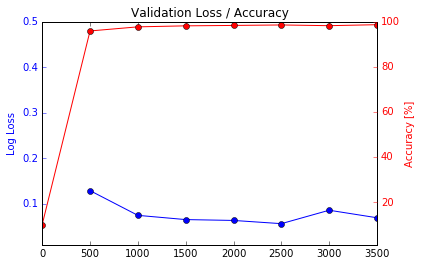

In [9]:
steps, loss, acc = zip(*history)

fig = plt.figure()
plt.title('Validation Loss / Accuracy')
ax_loss = fig.add_subplot(111)
ax_acc = ax_loss.twinx()
plt.xlabel('Training Steps')
plt.xlim(0, max(steps))

ax_loss.plot(steps, loss, '-o', color='blue')
ax_loss.set_ylabel('Log Loss', color='blue');
ax_loss.tick_params('y', colors='blue')
ax_loss.set_ylim(0.01, 0.5)

ax_acc.plot(steps, acc, '-o', color='red')
ax_acc.set_ylabel('Accuracy [%]', color='red');
ax_acc.tick_params('y', colors='red')
ax_acc.set_ylim(1,100)

plt.show()

In [13]:
test = pd.read_csv('data/test.csv') # Read csv file in pandas dataframe
test_data = StandardScaler().fit_transform(np.float32(test.values)) # Convert the dataframe to a numpy array
test_data = test_data.reshape(-1, WIDTH, WIDTH, CHANNELS) # Reshape the data into 42000 2d images

In [14]:
test_pred = session.run(tf_pred, feed_dict={tf_data:test_data})
test_labels = np.argmax(test_pred, axis=1)

In [15]:
# fd = {tf_data:valid_test_data, tf_labels:valid_test_labels}
# valid_loss, valid_accuracy = session.run([tf_loss, tf_acc], feed_dict=fd)
# print('Valid. Acc. = %f'% test_pred, end='\n')

In [16]:
# k = 2 # Try different image indices k
# print("Label Prediction: %i"%test_labels[k])
# fig = plt.figure(figsize=(2,2)); plt.axis('off')
# plt.imshow(test_data[k,:,:,0]); plt.show()

In [17]:
submission = pd.DataFrame(data={'ImageId':(np.arange(test_labels.shape[0])+1), 'Label':test_labels})
submission.to_csv('submission.csv', index=False)
submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
